In [130]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('chocolate_data.csv')
formula = 'price ~ weight + is_sugar_first + kcal + rating + palm + package + type + rus_brand + no_sugar + cocoa + filling_NUTS + filling_BERRIES + filling_SNACKS + filling_DESSERT + filling_EXOTIC + food_additives'

quantiles = [0.2, 0.5, 0.9]
results = {}

for q in quantiles:
    model = smf.quantreg(formula, data)
    res = model.fit(q=q, max_iter=10000)
    results[q] = res

variables = list(res.params.index)

new_var = {'package[T.Бумага]': 'Бумага', 'package[T.Флоупак]': 'Флоупак', \
            'type[T.Горький]': 'Горький', 'type[T.Молочный]': 'Молочный', 'type[T.Темный]': 'Темный'}

def process(var):
    if var in new_var:
        return new_var[var]
    if var[:7] == 'filling':
        return var[8:]
    if var[:2] == 'is':
        return var[3:]
    return var

results_df = pd.DataFrame()
results_df2 = pd.DataFrame()
results_df3 = pd.DataFrame()

for q in quantiles:
    coefs = results[q].params
    rounded_coefs = [round(coefs[var], 2) if var in coefs else np.nan for var in variables]
    pval = results[q].pvalues
    rounded_pvals = [round(pval[var], 2) if var in coefs else np.nan for var in variables]
    bse = results[q].bse
    rounded_bses = [round(bse[var], 2) if var in coefs else np.nan for var in variables]
    results_df[f'q={q}'] = rounded_coefs
    results_df2[f'q={q}'] = rounded_pvals
    results_df3[f'q={q}'] = rounded_bses

results_df = results_df.T
results_df2 = results_df2.T
results_df3 = results_df3.T
results_df.columns = [process(var.replace('_', ' ')) for var in variables]
results_df2.columns = [process(var.replace('_', ' ')) for var in variables]
results_df3.columns = [process(var.replace('_', ' ')) for var in variables]

results_df

,Intercept,Бумага,Флоупак,Горький,Молочный,Темный,weight,sugar first,kcal,rating,palm,rus brand,no sugar,cocoa,NUTS,BERRIES,SNACKS,DESSERT,EXOTIC,food additives
q=0.2,-479.01,10.46,-27.55,3.66,-3.17,-14.75,1.56,26.48,0.12,74.62,-3.87,-12.95,18.42,1.29,-0.92,4.86,-7.81,-4.11,3.86,-11.36
q=0.5,-398.14,15.48,-18.13,14.87,-6.09,-15.16,2.72,27.84,0.18,30.12,-16.00,-11.54,65.13,1.31,-0.33,7.32,-7.85,1.82,7.71,-5.61
q=0.9,-546.03,15.37,-31.78,126.49,0.56,8.96,3.88,56.50,0.06,66.05,-26.99,26.61,68.97,-0.43,-11.42,13.68,-16.06,-17.01,-8.47,-25.79


In [132]:
results_df2

,Intercept,Бумага,Флоупак,Горький,Молочный,Темный,weight,sugar first,kcal,rating,palm,rus brand,no sugar,cocoa,NUTS,BERRIES,SNACKS,DESSERT,EXOTIC,food additives
q=0.2,0.00,0.18,0.0,0.83,0.67,0.18,0.0,0.06,0.03,0.00,0.53,0.02,0.20,0.0,0.83,0.40,0.21,0.39,0.53,0.06
q=0.5,0.00,0.02,0.0,0.37,0.36,0.13,0.0,0.01,0.00,0.07,0.00,0.02,0.00,0.0,0.93,0.15,0.17,0.69,0.12,0.18
q=0.9,0.02,0.33,0.0,0.06,0.98,0.78,0.0,0.09,0.66,0.14,0.04,0.02,0.01,0.7,0.19,0.17,0.26,0.11,0.54,0.00


In [122]:
# print('\[')
# print(results_df.iloc[:, 0:8] .to_latex(float_format="%.2f"), end='')
# print('\]')
# print('\[')
# print(results_df.iloc[:, 8:16] .to_latex(float_format="%.2f"), end='')
# print('\]')
# print('\[')
# print(results_df.iloc[:, 16:] .to_latex(float_format="%.2f"), end='')
# print('\]')

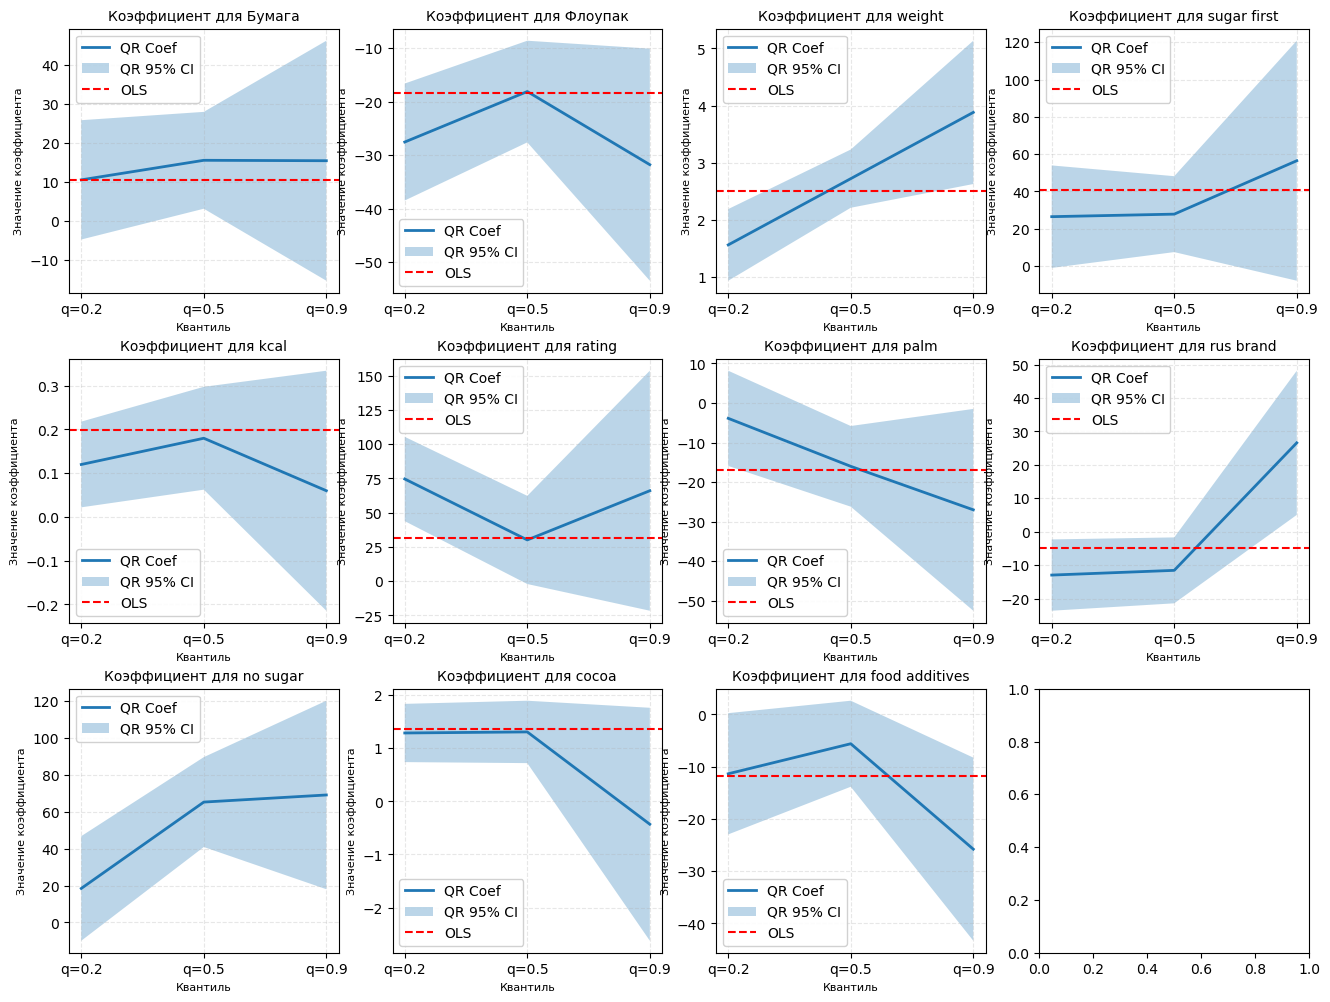

In [134]:
mses_pre = {'Intercept': np.float64(-406.6893663418783),
 'package[T.Бумага]': np.float64(10.36342329525397),
 'package[T.Флоупак]': np.float64(-18.434318640729874),
 'type[T.Горький]': np.float64(26.212110470852608),
 'type[T.Молочный]': np.float64(-0.5630973266623638),
 'type[T.Темный]': np.float64(-16.959295523751976),
 'weight': np.float64(2.496000590229825),
 'is_sugar_first': np.float64(40.69199959203274),
 'palm': np.float64(-16.98717409285466),
 'kcal': np.float64(0.19890172637413386),
 'rating': np.float64(31.541079875167),
 'cocoa': np.float64(1.3669603589405597),
 'rus_brand': np.float64(-4.940248954492658),
 'filling_NUTS': np.float64(-4.576539720842021),
 'filling_BERRIES': np.float64(5.205649796970022),
 'filling_SNACKS': np.float64(-8.695021752684347),
 'filling_DESSERT': np.float64(-0.5538894316978424),
 'filling_EXOTIC': np.float64(2.055052770447041),
 'food_additives': np.float64(-11.70140698322653)}

mses = {process(var.replace('_', ' ')): mses_pre[var] for var in mses_pre}

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
axes = axes.flatten()
i = 0
for var in results_df.columns:
    if var == 'Intercept':
        continue
    if (results_df2[var] < 0.05).sum() > 0:
        ax = axes[i]
        i += 1
        sns.lineplot(data=results_df.reset_index(), x='index', y=var, ax=ax,
                label='QR Coef', linewidth=2)
        ax.fill_between(results_df.index,
                       results_df[var] - 1.96 * results_df3[var],
                       results_df[var] + 1.96 * results_df3[var],
                       alpha=0.3, label='QR 95% CI')

        if var in mses:
            ax.axhline(mses[var],
                      color='red', linestyle='--',
                      linewidth=1.5, label='OLS')
    
        ax.set_title(f'Коэффициент для {var}', fontsize=10)
        ax.set_xlabel('Квантиль', fontsize=8)
        ax.set_ylabel('Значение коэффициента', fontsize=8)
        ax.legend(fontsize=10, framealpha=0.9)
        ax.grid(True, linestyle='--', alpha=0.3)

plt.subplots_adjust(hspace=0.25)
plt.show()